In [1]:
import pandas as pnd #para manejar el dataframe
import numpy as np #para abrir el csv
import matplotlib.pyplot as plt #para graficar 
import sklearn as sk #para normalizar los datos

In [2]:
X = pnd.read_csv('incidenciaMunicipal_FINAL.csv')
X.head()

,Unnamed: 0,CVE_ENT,CVE_MUN,CVE_MOD,CVE_TIPO,CVE_SUBTIPO,ENERO,FEBRERO,MARZO,ABRIL,MAYO,JUNIO,JULIO,AGOSTO,SEPTIEMBRE,OCTUBRE,NOVIEMBRE,DICIEMBRE,TOTAL_DELITOS,VIVIENDA_ENDUTIH
0,0,1,1,6,15,16,4,3,0,7,4,6,4,3,4,1,4,7,43,2
1,1,1,1,6,15,17,9,10,10,11,11,6,10,18,8,3,14,14,115,2
2,2,1,1,6,15,18,4,1,5,3,0,1,1,4,2,5,6,4,32,2
3,3,1,1,6,15,19,0,0,0,0,1,0,0,0,0,0,1,0,2,2
4,4,1,1,6,15,20,34,32,46,44,49,34,49,56,34,24,49,32,449,2


In [3]:
X.drop('Unnamed: 0',1,inplace=True)

In [4]:
X.head()

,CVE_ENT,CVE_MUN,CVE_MOD,CVE_TIPO,CVE_SUBTIPO,ENERO,FEBRERO,MARZO,ABRIL,MAYO,JUNIO,JULIO,AGOSTO,SEPTIEMBRE,OCTUBRE,NOVIEMBRE,DICIEMBRE,TOTAL_DELITOS,VIVIENDA_ENDUTIH
0,1,1,6,15,16,4,3,0,7,4,6,4,3,4,1,4,7,43,2
1,1,1,6,15,17,9,10,10,11,11,6,10,18,8,3,14,14,115,2
2,1,1,6,15,18,4,1,5,3,0,1,1,4,2,5,6,4,32,2
3,1,1,6,15,19,0,0,0,0,1,0,0,0,0,0,1,0,2,2
4,1,1,6,15,20,34,32,46,44,49,34,49,56,34,24,49,32,449,2


In [5]:
y = X[['TOTAL_DELITOS']]
y.head()

,TOTAL_DELITOS
0,43
1,115
2,32
3,2
4,449


In [40]:
print(y.TOTAL_DELITOS.value_counts())

0        35623
1         3446
2         1953
3         1280
4          976
5          802
6          622
7          501
8          442
9          402
10         343
11         328
13         249
12         248
14         214
15         200
16         195
17         183
18         167
21         143
19         136
23         130
20         130
22         113
24         112
26          97
27          97
25          97
28          82
32          76
         ...  
1615         1
1007         1
498          1
975          1
911          1
847          1
2830         1
687          1
655          1
495          1
1296         1
1520         1
1872         1
3953         1
434          1
402          1
370          1
10423        1
4080         1
1873         1
1297         1
1201         1
1009         1
913          1
753          1
721          1
593          1
369          1
2128         1
6860         1
Name: TOTAL_DELITOS, Length: 910, dtype: int64


In [6]:
X = X[X.columns.difference(['TOTAL_DELITOS'])]
X.head()

,ABRIL,AGOSTO,CVE_ENT,CVE_MOD,CVE_MUN,CVE_SUBTIPO,CVE_TIPO,DICIEMBRE,ENERO,FEBRERO,JULIO,JUNIO,MARZO,MAYO,NOVIEMBRE,OCTUBRE,SEPTIEMBRE,VIVIENDA_ENDUTIH
0,7,3,1,6,1,16,15,7,4,3,4,6,0,4,4,1,4,2
1,11,18,1,6,1,17,15,14,9,10,10,6,10,11,14,3,8,2
2,3,4,1,6,1,18,15,4,4,1,1,1,5,0,6,5,2,2
3,0,0,1,6,1,19,15,0,0,0,0,0,0,1,1,0,0,2
4,44,56,1,6,1,20,15,32,34,32,49,34,46,49,49,24,34,2


### redimensionamos X

In [8]:
from sklearn import decomposition

In [9]:
pca = decomposition.PCA(n_components=1)
pca.fit(X)
X = pca.transform(X)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [13]:
X_train.shape

(42926, 1)

In [15]:
y_train.shape

(42926, 1)

In [16]:
X_test.shape

(10732, 1)

In [17]:
y_test.shape

(10732, 1)

In [18]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (brier_score_loss, precision_score, recall_score,
                             f1_score)

In [19]:
clf_gNB = GaussianNB()
clf_gNB.fit(X_train, y_train)

/home/desarrollo/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None)

In [34]:
y_pred = clf_gNB.predict(X_test)
print(y_pred.tolist())

[113, 150, 0, 0, 0, 355, 0, 0, 0, 0, 0, 25, 0, 0, 0, 0, 0, 0, 321, 0, 0, 0, 452, 0, 0, 0, 0, 0, 0, 0, 18, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 18, 0, 0, 25, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 32, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 62, 0, 0, 37, 0, 0, 0, 0, 23, 0, 0, 0, 0, 0, 0, 128, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 69, 0, 0, 0, 0, 0, 0, 0, 0, 32, 0, 0, 0, 0, 0, 0, 0, 32, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 47, 0, 0, 0, 0, 0, 0, 0, 0, 128, 0, 73, 0, 0, 0, 84, 0, 0, 0, 0, 0, 25, 0, 0, 201, 0, 0, 0, 47, 0, 25, 0, 0, 0, 0, 0, 32, 105, 0, 0, 0, 0, 0, 0, 0, 39, 0, 0, 0, 25, 0, 0, 0, 0, 0, 25, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 53, 0, 0, 18, 0, 0, 0, 69, 0, 0, 0, 0, 88, 0, 413, 0, 0, 0, 25, 0, 0, 0, 0, 0, 18, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 496, 25, 0, 0, 0, 116, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [21]:
performance = clf_gNB.score(X_test,y_test)
performance*100

67.58292955646664

In [22]:
o = clf_gNB.predict(X_test)
o = (o).T
o = o.tolist()

In [23]:
y_test_per = y_test.TOTAL_DELITOS.tolist()
hits=0
for i in range(1, len(o)):
    if o[i] == y_test_per[i]:
        hits += 1
        
print('performance: ', round((hits/len(o))*100),'%')

performance:  68 %


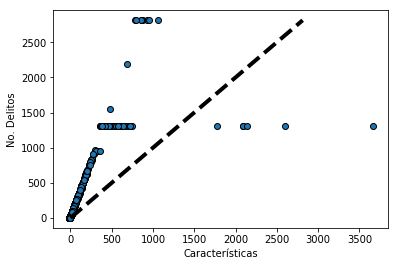

In [43]:
fig, ax = plt.subplots()
ax.scatter(X_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()], 'k--', lw=4)
ax.set_xlabel('Características')
ax.set_ylabel('No. Delitos')
plt.show()